In [1]:
import os
import sys
from pywavesurfer import ws
sys.path.append('/Users/zhengj10/Python/Modules')
from Fly_MN_ephys import *
from glob import glob
import matlab.engine
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
import seaborn as sns
from scipy.optimize import curve_fit
from termcolor import colored
import pandas as pd

In [13]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys'
# dataPath = '/Users/zhengj10/Desktop/NMJ imaging'
date = '230505'
larva = 'Larva_3'
newData = os.path.join(dataPath,date,larva)
os.path.exists(newData)

True

#### Rename according to trial type

In [14]:
trials = glob(newData+'/*.h5')
trials = sorted(trials)
trials

['/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0001.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0002.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0003.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0004.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0005.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0006.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0007.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0008-0017.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0018.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0019.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0020.h5',
 '/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0021.h5',
 '/Volumes/genie/Jihong_GENIE_stuff

In [15]:
# eng = matlab.engine.start_matlab()

In [16]:
len(trials)
trials[7]

'/Volumes/genie/Jihong_GENIE_stuff/NMJ_ephys/230505/Larva_3/untitled_0008-0017.h5'

In [17]:
for i in range(len(trials)):
    data = ws.loadDataFile(trials[i])
    trialTypeIndex = data['header']['StimulusLibrary']['SelectedOutputableIndex']
    trialType = data['header']['StimulusLibrary']['Maps']['element%s' %int(trialTypeIndex)]['Name']
    trialType = trialType[0].decode('UTF-8')
#     print(trialType)
    if i==7:
        os.rename(trials[i],os.path.join(newData,'trial_'+str(i+1).zfill(2)+'_'+trialType+'.h5'))
    elif i<7:
        os.rename(trials[i],os.path.join(newData,trialType.replace('Opto_stim','trial_%s_530nm') %str(i+1).zfill(2)+'.h5'))
    elif 15>i>7:
        os.rename(trials[i],os.path.join(newData,trialType.replace('Opto_stim','trial_%s_660nm') %str(i+1).zfill(2)+'.h5'))
    else:
        os.rename(trials[i],os.path.join(newData,trialType.replace('Opto_stim','trial_%s_488nm') %str(i+1).zfill(2)+'.h5'))
    print(os.path.basename(trials[i]),trialType)

untitled_0001.h5 Opto_stim_1ms_0.2-4.9V
untitled_0002.h5 Opto_stim_10ms_0.2-4.9V
untitled_0003.h5 Opto_stim_100ms_0.2-4.9V
untitled_0004.h5 Opto_stim_500ms_0.2-4.9V
untitled_0005.h5 Opto_stim_1s_0.5_and_4.9V
untitled_0006.h5 Opto_stim_10s_0.5_and_4.9V
untitled_0007.h5 Opto_stim_30s_0.5_and_4.9V
untitled_0008-0017.h5 Mem_test
untitled_0018.h5 Opto_stim_1ms_0.2-4.9V
untitled_0019.h5 Opto_stim_10ms_0.2-4.9V
untitled_0020.h5 Opto_stim_100ms_0.2-4.9V
untitled_0021.h5 Opto_stim_500ms_0.2-4.9V
untitled_0022.h5 Opto_stim_1s_0.5_and_4.9V
untitled_0023.h5 Opto_stim_10s_0.5_and_4.9V
untitled_0024.h5 Opto_stim_30s_0.5_and_4.9V
untitled_0025.h5 Opto_stim_1ms_0.2-4.9V
untitled_0026.h5 Opto_stim_10ms_0.2-4.9V
untitled_0027.h5 Opto_stim_100ms_0.2-4.9V
untitled_0028.h5 Opto_stim_500ms_0.2-4.9V
untitled_0029.h5 Opto_stim_1s_0.5_and_4.9V
untitled_0030.h5 Opto_stim_10s_0.5_and_4.9V
untitled_0031.h5 Opto_stim_30s_0.5_and_4.9V


In [ ]:
trials = glob(os.path.join(dataPath,date,larva)+'/*.h5')
trials = sorted(trials)
# trials

#### Plotting raw current traces (comparing 530 and 660 nm)

In [35]:
trials_660 = sorted(glob(os.path.join(dataPath,date,larva)+'/*660nm*.h5'))
trials_530 = sorted(glob(os.path.join(dataPath,date,larva)+'/*530nm*.h5'))
trials_488 = sorted(glob(os.path.join(dataPath,date,larva)+'/*488nm*.h5'))
# trials_488

In [36]:
# plt.plot(data[k]['analogScans'][1])
# k
os.path.basename(trials_660[0]).split('_')[3]
# trials_660

'1ms'

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


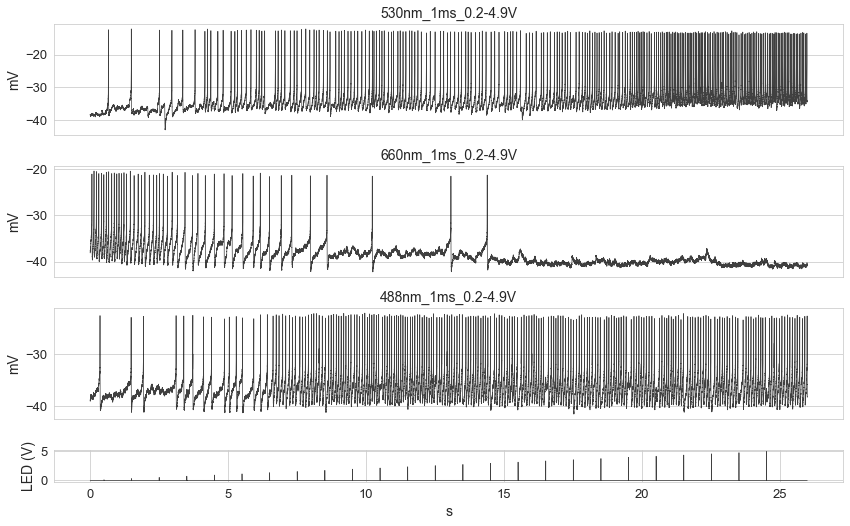

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


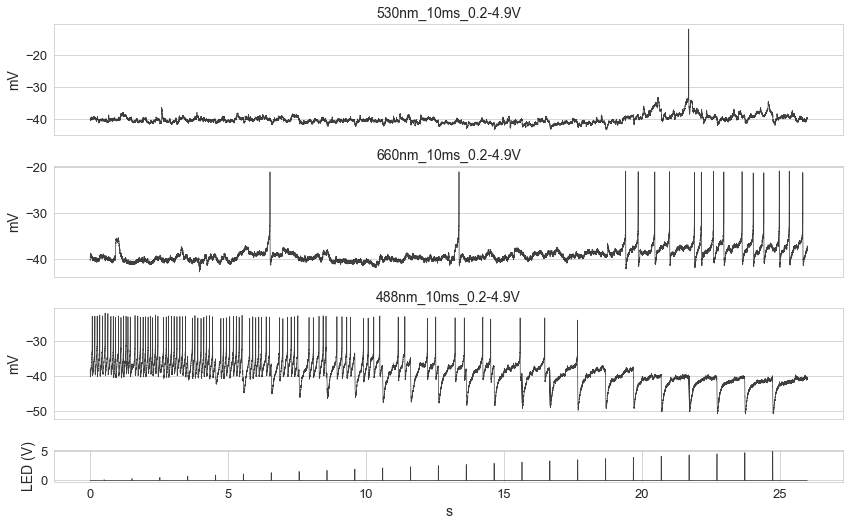

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


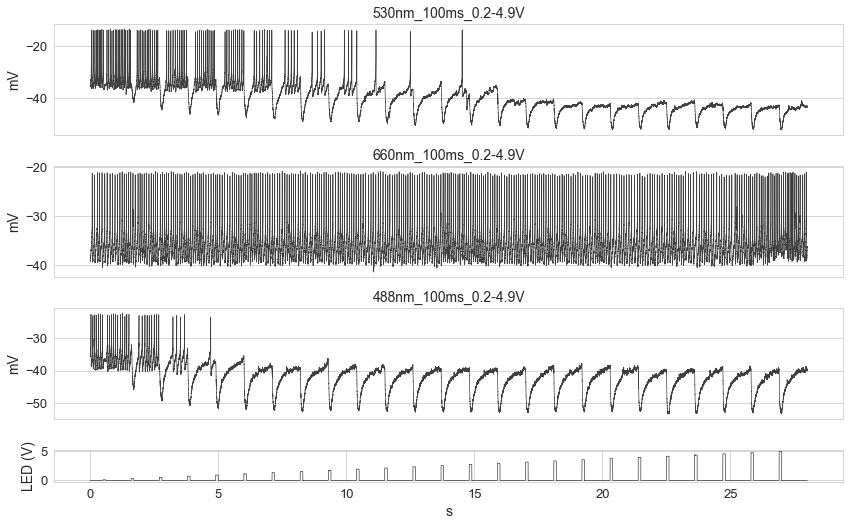

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


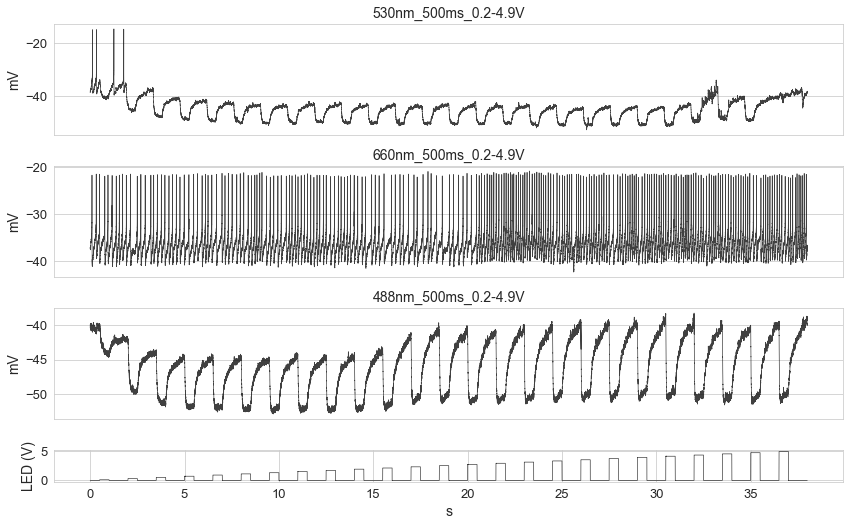

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


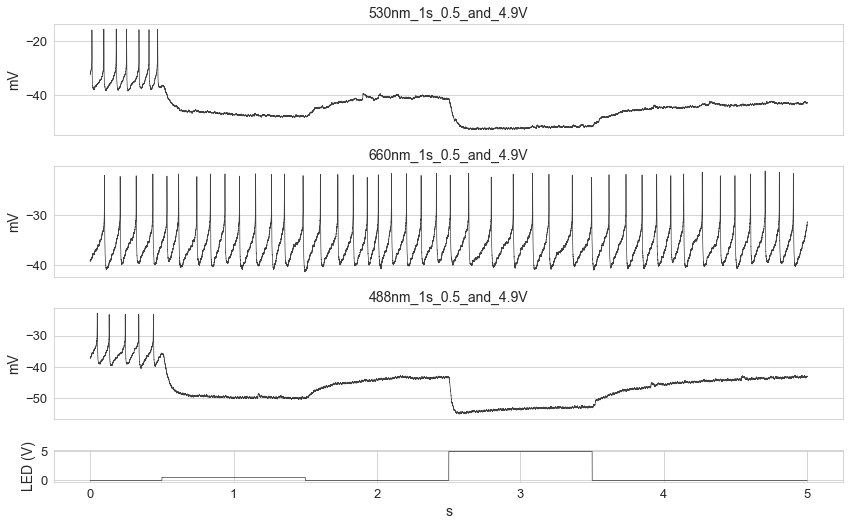

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


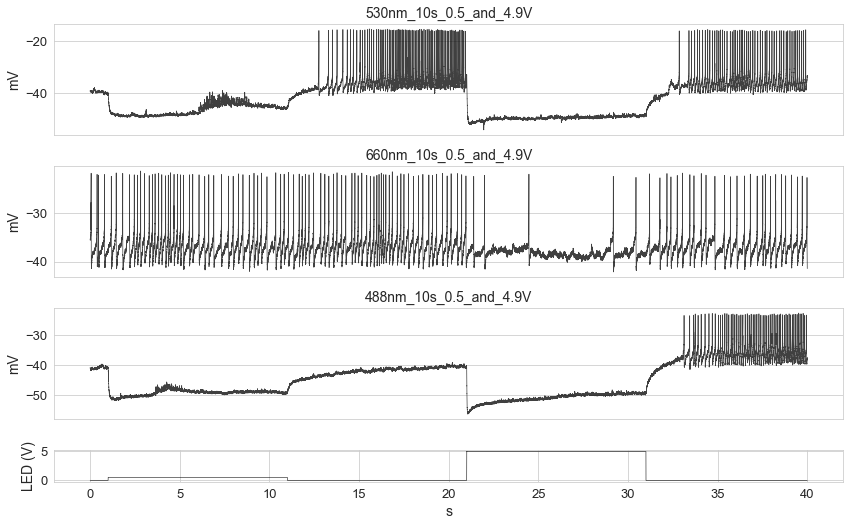

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


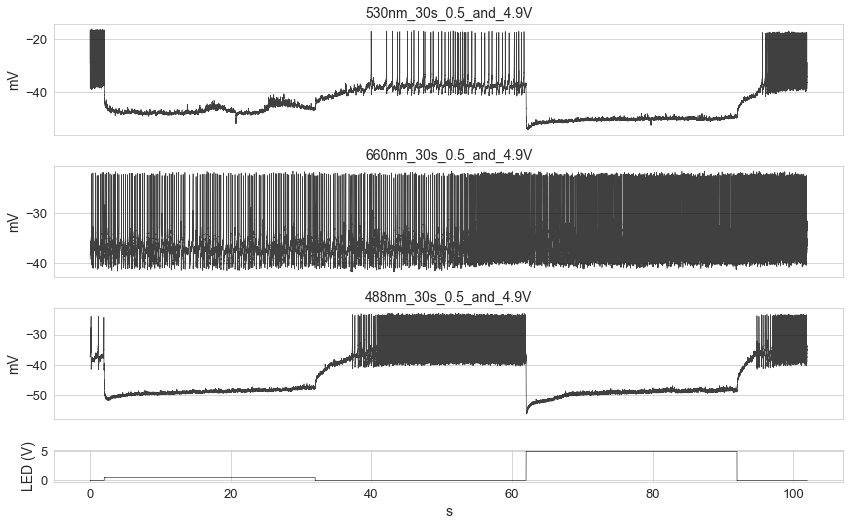

In [38]:
sns.set_style('whitegrid')
for i in range(len(trials_530)):
    f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,gridspec_kw={'height_ratios':[3.5,3.5,3.5,1]})
    plt.rc('font',size=13)
#     f.set_size_inches(12,5.5)
    f.set_size_inches(12,7.5)
    data = ws.loadDataFile(trials_530[i])
    k = sorted(data.keys())[1]
    x = np.arange(data[k]['analogScans'][0].shape[0])/2e4
    ax1.plot(x,data[k]['analogScans'][0],color='k',alpha=0.75,lw=0.7)
    ax1.set_ylabel('mV',size=14)
    ax1.set_title(os.path.basename(trials_530[i])[9:-3],size=14)
    ax1.get_xaxis().set_visible(False)
    
    data = ws.loadDataFile(trials_660[i])
    k = sorted(data.keys())[1]
    x = np.arange(data[k]['analogScans'][0].shape[0])/2e4
    ax2.plot(x,data[k]['analogScans'][0],color='k',alpha=0.75,lw=0.7)
    ax2.set_ylabel('mV',size=14)
    ax2.set_title(os.path.basename(trials_660[i])[9:-3],size=14)
    ax2.get_xaxis().set_visible(False)

    data = ws.loadDataFile(trials_488[i])
    k = sorted(data.keys())[1]
    x = np.arange(data[k]['analogScans'][0].shape[0])/2e4
    ax3.plot(x,data[k]['analogScans'][0],color='k',alpha=0.75,lw=0.7)
    ax3.set_ylabel('mV',size=14)
    ax3.set_title(os.path.basename(trials_488[i])[9:-3],size=14)
    ax3.get_xaxis().set_visible(False)
    
    ax4.plot(x,data[k]['analogScans'][1],color='k',alpha=0.75,lw=0.7)
    ax4.set_xlabel('s',size=14)
    ax4.set_ylabel('LED (V)',size=14)
    
    savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230425/NMJ_ephys'
    if not os.path.exists(savePath):
        os.makedirs(savePath)
    f.tight_layout()
    f.savefig(savePath+'/%s_C10-46.svg' %os.path.basename(trials_660[i]).split('_')[3],format='svg')
    plt.show()

#### Check meta data (log.txt file)

In [ ]:
df = pd.read_csv('/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230417/log.txt',sep='\t')
df

In [ ]:
df.loc[0,'Line']

In [ ]:
os.path.basename(trials_660[i]).split('_')[3]

In [9]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys'
dates = glob(dataPath+'/2304*')
dates.sort()

In [18]:
df_log = pd.DataFrame()
for d in dates:
    print(d)
    Date.append(d)
    df_t = pd.read_csv(d+'/log.txt',sep='\t')
    df_t['Date'] = os.path.basename(d)
    df_log = pd.concat([df_log,df_t],axis=0)
df_log.index = np.arange(len(df_log))

/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230413
/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230414
/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230417
/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230418
/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230419
/Volumes/genie/Jihong_GENIE_stuff/NMJ ephys/230420


In [19]:
for l in df_log['Line'].unique():
    df_t = df_log[df_log['Line']==l]
    print(l,len(df_t))

C10-42 5
C10-46 5
C10-43 5


In [20]:
df_log

,Larva,Line,Gender,Segment,Side,Remark,Date
0,Larva_1,C10-42,F,A2,R,NaN,230413
1,Larva_1,C10-46,F,A2,R,NaN,230414
2,Larva_2,C10-43,F,A2,R,high SR; leak 20-50 pA for 530 and 660 nm,230414
3,Larva_3,C10-46,F,A2,R,"No response to 530, 660 or 488 nm",230414
4,Larva_1,C10-42,F,A4,R,"leak present, -100 pA to hold RMP at around -3...",230417
5,Larva_2,C10-43,F,A2,L,NaN,230417
6,Larva_1,C10-42,F,A2,L,membrane potential fluctuate; variable spike a...,230418
7,Larva_2,C10-43,F,A3,R,membrane potential fluctuate during 530 nm,230418
8,Larva_3,C10-46,F,A2,R,NaN,230418
9,Larva_1,C10-46,F,A3,R,Leak & reseal occrured after 500 ms trial (530...,230419


#### Control data

In [ ]:
plt.figure(figsize=[13,4])
plt.rc('font',size=13)
f = os.path.join(newData,'untitled_0001.h5')
data = eng.ws.loadDataFile(f)

In [ ]:
plt.figure(figsize=[13,4])
plt.rc('font',size=13)
k = sorted(data.keys())[1]
x = np.arange(np.array(data[k]['analogScans']).shape[0])/1e4
ax = plt.subplot(111)
ax.plot(x,np.array(data[k]['analogScans'])[:,0],color='k',alpha=0.75,lw=0.7)
ax.set_ylabel('mV')
ax.set_xlabel('s')
ax.set_title('Control',size=14)
plt.tight_layout()
# plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/221101/NMJ_ephys/control.png',dpi=1200)
plt.show()

In [ ]:
dl = 0.5
interval = 1.0
sr = 20000.0
X = []
Y = []
# trial = trials[2] #+8
mp = np.array(data[k]['analogScans'])[:,0]
for i in range(25):
    X.append(0.1+i*0.2)
    Y.append(np.min(mp[int(1.001*i*sr):int(1.001*i*sr)+5000])-np.min(mp[int((0.5+1.001*i)*sr):int((0.5+1.001*i)*sr)+5000]))

In [ ]:
plt.figure(figsize=[5,3.5])
plt.plot(X,Y,label='660 nm')
plt.plot(X,Y1,label='530 nm')
# plt.legend()
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221026/NMJ_ephys/1ms.png',dpi=1200)
plt.show()

In [ ]:
data = eng.ws.loadDataFile('/Users/zhengj10/Desktop/mem_test_3.h5')

In [ ]:
I_trace = []
for k in sorted(data.keys()):
    if 'sweep' in k:
        i_trace = np.array(data[k]['analogScans'])[:,0]
        I_trace.append(i_trace)
mc = np.mean(I_trace,axis=0)

In [ ]:
trace = mc[:5000]*-1
plt.plot(trace)

In [ ]:
def mem_test(trace,r=1,sr=100.0,V_step=10): # r: estimated tau_f/tau_s; sr: samples/ms
    peak,_ = ss.find_peaks(trace,height=np.max(trace)-10)
    trace_to_fit = trace[peak[0]:]
    x = np.arange(trace_to_fit.shape[0])/sr
    e = trace_to_fit[-1]
    c = trace_to_fit[0]/(r+1)
    a = r*c
    
    trace_to_fit_f = trace_to_fit[:100]
    trace_to_fit_s = trace_to_fit[500:]

#     x_f = np.arange(1,trace_to_fit_f.shape[0]+1)
#     c_f = trace_to_fit_f[-1]
#     a_f = trace_to_fit_f[0]-c
#     tau_idx = np.argmin(np.abs(trace_to_fit_f-c-(trace_to_fit_f[0]-c)*0.368))
#     tau = trace_to_fit_f[tau_idx]
#     b = -1/tau
#     p_f,_ = curve_fit(lambda x,a,b,c:a*np.exp(b*x)+c,x_f,trace_to_fit_f,p0=[a_f,b,c_f])

#     x_s = np.arange(1,trace_to_fit_s.shape[0]+1)
#     c_s = trace_to_fit_s[-1]
#     a_s = trace_to_fit_s[0]-c
#     tau_idx = np.argmin(np.abs(trace_to_fit_s-c-(trace_to_fit_s[0]-c)*0.368))
#     tau = trace_to_fit_s[tau_idx]
#     d = -1/tau
#     p_s,_ = curve_fit(lambda x,a,b,c:a*np.exp(b*x)+c,x_s,trace_to_fit_s,p0=[a_s,d,c_s])
    
#     p,_ = curve_fit(lambda x,a,b,c,d,e:a*np.exp(b*x)+c*np.exp(d*x)+e,x,trace_to_fit,p0=[a,b,c,d,e])

    p,_ = curve_fit(lambda x,a,b,c,d,e:a*np.exp(b*x)+c*np.exp(d*x)+e,x,trace_to_fit,p0=[a,-0.01*sr,c,-0.1*sr,e])
    
    Q_1_trace = p[0]*np.exp(p[1]*x)+p[2]*np.exp(p[3]*x)+p[4]
    plt.plot(x,Q_1_trace,color='m')
    
    Q_1 = np.sum(trace_to_fit-np.mean(trace_to_fit[-100:]))/sr
    Q_1 = np.abs(Q_1)
    ratio = p[0]/p[2]
    c = np.mean(trace[1000:1500])-p[4]/(ratio+1)
    a = ratio*c
    Q_2_trace = a*np.exp(p[1]*x)+c*np.exp(p[3]*x)+e
    Q_2 = np.sum(Q_2_trace-np.mean(Q_2_trace[-100:]))/sr
    Q_2 = np.abs(Q_2)
    Cm = (Q_1+Q_2)/V_step
    tau_1 = (1/np.abs(p[1]))
    tau_2 = (1/np.abs(p[3]))
    tau_t = ratio*tau_1/(ratio+1) + tau_2/(ratio+1)
    Rt = V_step*1000/(np.mean(trace[-1000:])-np.mean(trace[1000:1500]))
    Rm = np.sqrt(Rt**2/4-tau_t*1e6/Cm)+Rt/2 # 1e6 instead of 1e3 due to square root operation
    Ra = Rt - Rm
    print (colored('Ra: ',attrs=['bold'])+str(round(Ra, 2))+' M\u03A9')
    print (colored('Rm: ',attrs=['bold'])+str(round(Rm, 2))+' M\u03A9')
    print (colored('Cm: ',attrs=['bold'])+str(round(Cm, 2))+' pF')
    print (colored('tau_1: ',attrs=['bold'])+str(round(tau_1,3))+' ms')
    print (colored('tau_2: ',attrs=['bold'])+str(round(tau_2,3))+' ms')
    plt.plot(x,Q_2_trace,color='g')
    return p,Cm,Rm,Ra

In [ ]:
plt.figure(figsize=[12,7])
plt.rc('font',size=13)
peak,_ = ss.find_peaks(trace,height=np.max(trace)-10)
trace_to_fit = trace[peak[0]:]

x = np.arange(1,trace_to_fit.shape[0]+1)/100
plt.plot(x,trace_to_fit,color='gray',lw=10,alpha=0.5)
plt.xlabel('ms')
plt.ylabel('pA')

# x = np.arange(1,trace.shape[0]+1)
# plt.plot(x,trace)

A = mem_test(trace,r=1,V_step=10)

In [ ]:
plt.plot(trace)

In [ ]:
np.max(trace)-np.max(trace[:100])

In [ ]:
10000/139.35450756833745

In [ ]:
plt.figure(figsize=[13,5])
plt.plot(x,trace_to_fit)
plt.plot(x,p[0]*np.exp(p[1]*x)+p[2]*np.exp(p[3]*x)+p[4])
plt.plot(x,-12.534*np.exp(p[1]*x)-2.279*np.exp(p[3]*x)+p[4])
plt.xlim([-100,1000])
# plt.plot(x,p[0]*np.exp(p[1]*x)+p[4])
# plt.plot(x,p[2]*np.exp(p[3]*x))

In [ ]:
(np.mean(trace[:100])-p[4])*5.5/6.5

In [ ]:
Q_1 = np.sum((trace_to_fit-np.mean(trace_to_fit[-100:]))/100)
Q_1

In [ ]:
Q2 = np.sum((y-np.mean(y[-100:]))/100)
Q2

In [ ]:
y = -2.36*r*np.exp(p[1]*x)-2.36*np.exp(p[3]*x)+15.237120241794736

In [ ]:
# r1 = p[0]/(p[0]+p[2])
# r1
np.mean(mc[1000:1900])

In [ ]:
(0.852/p[1]+0.148/p[3])*(np.mean(trace_to_fit[-100:])-np.mean(mc[1000:1900]))

In [ ]:
p,_ = curve_fit(lambda t,a,b,c,d,e:a*np.exp(b*t)+c*np.exp(d*t)+e,x,trace_to_fit,p0=[200,-3,50,-0.2,15])
p

In [ ]:
trace[peak][0]-np.mean(trace[-100:]),-20,np.mean(trace[-100:]

In [ ]:
# int(a)
np.mean(trace[-100:])

In [ ]:
plt.figure(figsize=[8,3])
plt.rc('font', size=13)
ax = plt.subplot(111)
x = np.arange(mp.shape[0])/2e4
ax.plot(x,mp,color='k',alpha=0.7)
# os.path.basename(file).split('.')[0].split('_')[1]
# data['sweep_0017']
ax.set_xlim([3e4/2e4,23e4/2e4])
ax.set_xlabel('s')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()

In [ ]:
# data = newData + '/untitled_0017.h5'
# data_as_dict = ws.loadDataFile(filename=data)
# mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]
# plt.plot(mp)

In [ ]:
data = newData + '/untitled_0022.h5'
data_as_dict = ws.loadDataFile(filename=data)
plt.rc('font', size=13)

y_min_1 = []
y_max_1 = []

y_min_2 = []
y_max_2 = []

stim_trials = [17]
rmp_trials = [16]

for i in range(len(rmp_trials)):
    rmp_trial = rmp_trials[i]
    data = newData + '/untitled_%s.h5' %str(rmp_trial).zfill(4)
    data_as_dict = ws.loadDataFile(filename=data)
    mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]

    x = np.arange(1,mp.shape[0]+1)/data_as_dict['header']['AcquisitionSampleRate'][0][0]
    f, (ax1,ax2,ax3) = plt.subplots(3,1,gridspec_kw={'height_ratios': [2.32,5,1]},figsize=[12,5])

    ax1.plot(x,mp,color='k',alpha=0.75)
    ax1.get_xaxis().set_visible(False)
    
    y_min_1.append(ax1.get_ylim()[0])
    y_max_1.append(ax1.get_ylim()[1])
#     ax1.set_ylim([np.min(y_min_1),np.max(y_max_1)])

    
    stim_trial = stim_trials[i]
    data = newData + '/untitled_%s.h5' %str(stim_trial).zfill(4)
    data_as_dict = ws.loadDataFile(filename=data)
    mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]
    
    ax2.plot(x,mp,color='k',alpha=0.75)
    ax2.get_xaxis().set_visible(False)
    
    y_min_2.append(ax2.get_ylim()[0])
    y_max_2.append(ax2.get_ylim()[1])
#     ax2.set_ylim([np.min(y_min_2),np.max(y_max_2)])

    led = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][1]
    ax3.plot(x,led,color='k',alpha=0.75)


    plt.tight_layout()
    plt.savefig('/Users/zhengj10/Desktop/221011/fixed_duration.png',dpi=1200)
    plt.show()

In [ ]:
(np.max(y_max_1)-np.min(y_min_1))*5/(np.max(y_max_2)-np.min(y_min_2))

In [ ]:
plt.rc('font', size=13)

# y_min = []
# y_max = []

# d = {
#     18:'1ms',
#     21:'10ms',
#     22:'100ms',
#     25:'500ms',
#     26:'1000ms'
# }

d = {
    19:'1ms',
    20:'10ms',
    23:'100ms',
    24:'500ms',
    27:'1000ms'
}

# y_min_1 = []
# y_max_1 = []

# y_min_2 = []
# y_max_2 = []

stim_trials = [18,21,22,25,26]
rmp_trials = [19,20,23,24,27]

for i in range(len(rmp_trials)):
    rmp_trial = rmp_trials[i]
    data = newData + '/untitled_%s.h5' %str(rmp_trial).zfill(4)
    data_as_dict = ws.loadDataFile(filename=data)
    mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]

    x = np.arange(1,mp.shape[0]+1)/data_as_dict['header']['AcquisitionSampleRate'][0][0]
    f, (ax1,ax2,ax3) = plt.subplots(3,1,gridspec_kw={'height_ratios': [2.14,5,1]},figsize=[2,5])

    ax1.plot(x,mp,color='k',alpha=0.75)
    ax1.get_xaxis().set_visible(False)
    
#     y_min_1.append(ax1.get_ylim()[0])
#     y_max_1.append(ax1.get_ylim()[1])
    ax1.set_ylim([np.min(y_min_1),np.max(y_max_1)])

    
    stim_trial = stim_trials[i]
    data = newData + '/untitled_%s.h5' %str(stim_trial).zfill(4)
    data_as_dict = ws.loadDataFile(filename=data)
    mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]
    
    ax2.plot(x,mp,color='k',alpha=0.75)
    ax2.get_xaxis().set_visible(False)
    
#     y_min_2.append(ax2.get_ylim()[0])
#     y_max_2.append(ax2.get_ylim()[1])
    ax2.set_ylim([np.min(y_min_2),np.max(y_max_2)])

    led = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][1]
    ax3.plot(x,led,color='k',alpha=0.75)


    plt.tight_layout()
    plt.savefig('/Users/zhengj10/Desktop/221011/fixed_power_%s.png' %d[rmp_trial],dpi=1200)
    plt.show()

In [ ]:
(np.max(y_max_1)-np.min(y_min_1))/(np.max(y_max_2)-np.min(y_min_2))

In [ ]:
plt.figure(figsize=[13,4]) # for fixed power
# plt.figure(figsize=[13,1.5]) # for LED command
plt.rc('font', size=13)

# y_min = []
# y_max = []
i = 1
for f in [18,21,22,25,26]:
    data = newData + '/untitled_%s.h5' %str(f).zfill(4)
    data_as_dict = ws.loadDataFile(filename=data)
    mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]

    x = np.arange(1,mp.shape[0]+1)/data_as_dict['header']['AcquisitionSampleRate'][0][0]
    # plt.plot(x[:10000],mp[:10000],color='k',alpha=0.75)
    ax = plt.subplot(1,5,i)

    ax.plot(x,mp,color='k',alpha=0.75)
    ax.set_xlabel('s')
    if f == 18:
        ax.set_ylabel('LED (V)')
#     ax.set_title(f)
    ax.get_yaxis().set_label_coords(-0.3,0.5)
    
    i+=1
#     y_min.append(ax.get_ylim()[0])
#     y_max.append(ax.get_ylim()[1])
    ax.set_ylim([np.min(y_min),np.max(y_max)])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/fixed_power_10pA.png',dpi=1200)
plt.show()

In [ ]:
# data_as_dict.keys()
mp = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][0]

In [ ]:
sns.set_style('whitegrid')
# plt.figure(figsize=[13,4]) # for fixed duration
plt.figure(figsize=[3,4]) # for fixed power
plt.rc('font', size=13)
x = np.arange(1,mp.shape[0]+1)/data_as_dict['header']['AcquisitionSampleRate'][0][0]
# plt.plot(x[:10000],mp[:10000],color='k',alpha=0.75)
ax = plt.subplot(111)
ax.plot(x,mp,color='k',alpha=0.75)
ax.set_xlabel('s')
ax.set_ylabel('Membrane potential (mV)')
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/221011/fixed_power_100ms_10pA.png',dpi=1200)
plt.show()


In [ ]:
sns.set_style('whitegrid')
# plt.figure(figsize=[13,1.5]) # for fixed duration
plt.figure(figsize=[3,1.5]) # for fixed power
plt.rc('font', size=13)
led_mod = data_as_dict['sweep_%s' %os.path.basename(data).split('.')[0].split('_')[1]]['analogScans'][1]
x = np.arange(1,mp.shape[0]+1)/data_as_dict['header']['AcquisitionSampleRate'][0][0]
ax = plt.subplot(111)
ax.plot(x,led_mod,color='k',alpha=0.75)
ax.set_xlabel('s')
ax.set_ylabel('LED mod (V)')
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/221011/LED_mod_100ms.png',dpi=1200)
plt.show()


In [ ]:
# ax.get_ylim()

In [ ]:
x = [0,2,2,2.5,2.5,4,4,4.5,4.5,6,6,6.5,6.5,8,8,8.5,8.5,10,10,10.5,10.5,15]
y = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0]

# sns.set_style('whitegrid')
plt.figure(figsize=[13,1])
plt.rc('font', size=13)
plt.plot(x,y)
plt.axis('off')
plt.tight_layout()
plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/221004/NMJ_patching_current.png')
plt.show()